In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import time
n = 100
N = 10000
Bn = 0
for i in range(N):
	Bn = Bn + (i+1)**n/math.factorial(i+1)
Bn = Bn/math.e
print(Bn)

4.758539127676484e+115


In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
def K_gen(Bn,n):
	x = rng()
	k = 1
	f = 0
	while f < x:
		f += k**n/(math.factorial(k)*math.e*Bn)
		k+=1
		if k > 2*n:
			f = x
	return k-1
def C_gen(K):
	x = rng()
	f = 0
	i = 0
	while f < x:
		f += 1/K
		i +=1
	return i-1
def Generator(n , Bn):
	K = K_gen(Bn,n)
	C = np.empty(n)
	for i in range(n):
		C[i] = C_gen(K)
	return C
rng.current = 1
C = Generator(n,Bn)
Uniq = np.unique(C,axis = 0)
C1 = np.arange(n)
for i in Uniq:
	mask = i == C
	print(C1[mask]+1, "<-множество ", int(i+1))
"""последняя задача"""

[74] <-множество  1
[ 9 10 43 78] <-множество  2
[ 44  75 100] <-множество  3
[12 65 67 83 93] <-множество  4
[ 2 23 24 52 58] <-множество  5
[11 36 69 71 73 89] <-множество  6
[41 60 68] <-множество  7
[26 64] <-множество  8
[22 28 55 62] <-множество  9
[33 77 90 98] <-множество  10
[49 80] <-множество  11
[39] <-множество  12
[25 61] <-множество  13
[14 42 45 50 95] <-множество  14
[51 56 59 87] <-множество  15
[63] <-множество  16
[ 1  5 21 38] <-множество  17
[ 7 54 81] <-множество  18
[37 82 84 85] <-множество  19
[13 27 40 47 72 79] <-множество  20
[ 8 66 97] <-множество  21
[ 3 15 76] <-множество  22
[35] <-множество  23
[ 6 17 88] <-множество  24
[16 18 19 29 34 46 48 53 91 96] <-множество  25
[20 94 99] <-множество  26
[31 32 70 86] <-множество  27
[ 4 30 57 92] <-множество  28


'последняя задача'

time1 =  0.025314807891845703


<BarContainer object of 10 artists>

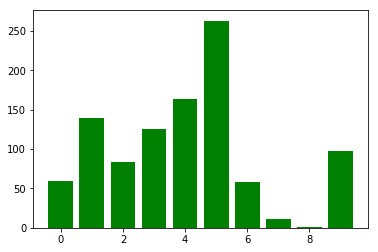

In [5]:
def KSI(a):
	x = rng()
	s = 0
	i=0
	while s<x:
		s+=a[i]
		i+=1
		if i > 9:
			return 9;
	return i-1
a = np.array([0.12,0.3,0.167,0.24,0.31,0.54,0.111,0.02,0.001,0.2], float)
a_norm = a/sum(a)
num = np.zeros(10)
start_time = time.time()
for i in range(1000):
	x = KSI(a_norm)
	num[x]+=1
print("time1 = ",time.time()-start_time)
fig, ax = plt.subplots()
ax.bar(np.arange(0,10), num, color = "green")


In [20]:
a_norm.sort()
start_time = time.time()
num = np.zeros(10)
for i in range(1000):
	x = KSI(a_norm)
	num[x]+=1
print("time2 = ",time.time()-start_time)
"""делаем вывод, программа работает быстрее"""

time2 =  0.03564858436584473


'делаем вывод, программа работает быстрее'

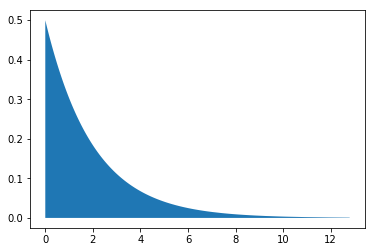

имеем плотность:


In [22]:
def EXP(h,x):
	ab = -(math.log(1-x))/h
	return (ab,h*math.exp(-h*ab))
X = np.empty(1000)
Y = np.empty(1000)
for i in range(1000):
	Y[i] = rng()
Y.sort()
for i in range(1000):
	X[i],Y[i] = EXP(0.5,Y[i])
plt.fill_between(X,0,Y)
plt.show()
print("имеем плотность:")

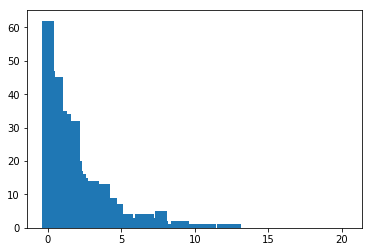

In [27]:
X1 = np.arange(0,20,0.1)
Y1 = np.zeros(len(X1))
for i in range(1000):
	x=X[i]
	k = 0
	t = 1
	while (x > X1[k]) and (t == 1):
		if k == len(X1)-1:
			t = 0
		else:
			k+=1
	Y1[k-1]+=1
fig, ax = plt.subplots()
ax.bar(X1, Y1)
plt.show()

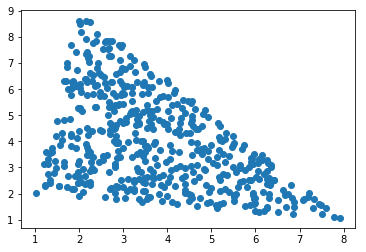

In [29]:
def triangle(a1,a2,a3):
	v1 = [a2[0] - a1[0],a2[1] - a1[1]]
	v2 = [a3[0] - a1[0],a3[1] - a1[1]]
	x = rng()
	y = rng()
	ax,ay = (a1[0]+v1[0]*x+v2[0]*y,a1[1]+v1[1]*x+v2[1]*y)
	if (a3[1]-a2[1])/(a3[0]-a2[0])*ax - (a3[1]-a2[1])/(a3[0]-a2[0])*a2[0]+a2[1] < ay:
		c_point = [(a2[0]+a3[0])/2,(a2[1]+a3[1])/2]
		ax = ax + 2*(c_point[0]-ax)
		ay = ay + 2*(c_point[1]-ay)
	return ax,ay
X = np.empty(500)
Y = np.empty(500)
for i in range(500):
	X[i],Y[i] = triangle([1,2],[2,9],[8,1])
plt.scatter(X,Y)
plt.show()

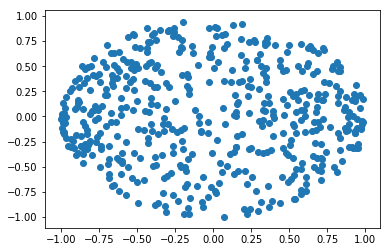

In [30]:
def KRUG():
	x1 = rng()*2-1
	x2 = rng()*2*math.sqrt(1-x1*x1) - math.sqrt(1-x1*x1)
	return x1,x2
X = np.empty(500)
Y = np.empty(500)
for i in range(500):
	X[i],Y[i] = KRUG()
plt.scatter(X,Y)
plt.show()